In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap

In [ ]:
root = "/content/drive/MyDrive/UVA MSDS/Capstone - Albemarle County Public Schools/Data/"
read_path = os.path.join(root, "Reading_Dataset_UVA_Deidentified_02-02-24.xlsx")
read_df = pd.read_excel(read_path)
print(read_df.columns)
# read_df = read_df.dropna(subset=['Value Added Score', 'Expected Achievement'])#[read_df[['Value Added Score', 'Expected Achievement']].dropna()]
# print(read_df.isna().any())

math_path = os.path.join(root, "Math_Dataset_UVA_Deidentified_03-18-24.xlsx")
math_df = pd.read_excel(math_path)
print(math_df.columns)
# print(math_df.isna().any())


Index(['Generated Unique Student ID', 'Race', 'Gender', 'English Learner',
       'Students with Disabilities', 'Grade', 'Test Name ',
       'Teacher License Type', 'Generated Unique Teacher ID',
       'Teacher Years Experience', 'Teacher Highest Degree',
       'Teacher Birth Year', 'Teacher Gender', 'Teacher Race/Ethnicity',
       'Certified Principal', 'Type of Principal Certification',
       'Certified Teacher', 'Type of Teacher Certification',
       'Year of Teacher Certification', 'Value Added Score',
       'Expected Achievement', 'Actual Achievement', 'Vertical Scaled Score',
       'Actual Achievement Percentile'],
      dtype='object')
Index(['Race', 'Gender', 'English Learner', 'Students with Disabilities',
       'Grade', 'Test Name ', 'Certified Principal',
       'Type of Principal Certification', 'Teacher License Type',
       'Generated Unique Teacher ID', 'Teacher Years Experience',
       'Teacher Highest Degree', 'Teacher Birth Year', 'Teacher Gender',
       'T

# Nonlinear regression models

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.3 

In [ ]:
!pip install joblib==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.0
    Uninstalling joblib-1.4.0:
      Successfully uninstalled joblib-1.4.0


In [ ]:
# import joblib
from pycaret.regression import *

In [ ]:
read_df = pd.read_excel(read_path)
read_df.drop(columns=['Year of Teacher Certification'])
read_df['Type of Teacher Certification'] = read_df['Type of Teacher Certification'].replace({np.nan: "NO_CERT"})
read_df['Type of Principal Certification'] = read_df['Type of Principal Certification'].replace({np.nan: "NO_CERT"})

# read_df_subset = read_df[['Teacher License Type',
#        'Teacher Years Experience', 'Teacher Highest Degree',
#        'Teacher Birth Year', 'Teacher Gender', 'Teacher Race/Ethnicity',
#        'Certified Principal', 'Type of Principal Certification',
#        'Certified Teacher', 'Type of Teacher Certification',
#        'Year of Teacher Certification', 'Vertical Scaled Score']]

# read_df_subset = read_df[['Certified Principal', 'Type of Principal Certification', 'Certified Teacher', 'Type of Teacher Certification',
#        'Actual Achievement']]

# read_df_subset = read_df[['Race', 'Gender', 'English Learner',
#        'Students with Disabilities', 'Grade',
#        'Teacher License Type',
#        'Teacher Years Experience', 'Teacher Highest Degree',
#        'Teacher Birth Year', 'Teacher Gender', 'Teacher Race/Ethnicity',
#        'Certified Principal', 'Type of Principal Certification',
#        'Certified Teacher', 'Type of Teacher Certification',
#        'Year of Teacher Certification', 'Actual Achievement']]

# read_df_subset = read_df[['Race', 'Gender', 'English Learner',
#        'Students with Disabilities', 'Grade',
#        'Actual Achievement']]

read_df_subset = read_df[[
       'Teacher License Type',
       'Teacher Years Experience', 'Teacher Highest Degree',
       'Teacher Birth Year', 'Teacher Gender', 'Teacher Race/Ethnicity',
       'Certified Principal', 'Type of Principal Certification',
       'Certified Teacher', 'Type of Teacher Certification',
       'Year of Teacher Certification', 'Actual Achievement']]


read_df_subset = pd.get_dummies(data=read_df_subset)

In [ ]:
math_df = pd.read_excel(math_path)
math_df.drop(columns=['Year of Certification'])
# math_df = math_df.dropna(subset=['Growth', 'Certified Principal', 'Year of Certification']) # year of certification takes out no and no_cert
# math_df = math_df.dropna(subset=['Growth'])
math_df['Type of Certification'] = math_df['Type of Certification'].replace({np.nan: "NO_CERT"})
math_df['Type of Principal Certification'] = math_df['Type of Principal Certification'].replace({np.nan: "NO_CERT"})
# math_df['Race'] = math_df['Race'].replace({'Hispanic': 'minority', 'Other': 'minority', 'Black, not of Hispanic origin': 'minority', 'White, not of Hispanic origin': 'majority'})
# math_df['Teacher Race/Ethnicity'] = math_df['Teacher Race/Ethnicity'].replace({'White': 'majority', 'Asian': 'minority', 'Hispanic or Latino': 'minority', 'American Indian or Alaska Native': 'minority',
#  'Black or African American': 'minority'})

# print(math_df.isnull().values.any())
# print(math_df.isna().any())
# print(math_df['Certified Principal'].unique())

# X = math_df[['Race', 'Gender', 'English Learner',
#        'Students with Disabilities', 'Growth']]
# math_df_subset = math_df[['Certified Principal', 'Type of Principal Certification',
#        'Teacher License Type',
#        'Teacher Years Experience', 'Teacher Highest Degree',
#        'Teacher Gender', 'Teacher Race/Ethnicity',
#        'Certified Teacher', 'Type of Certification', 'Growth']]

# math_df_subset = math_df[['Race', 'Gender', 'English Learner', 'Students with Disabilities',
#        'Grade', 'Certified Principal',
#        'Type of Principal Certification', 'Teacher License Type',
#        'Teacher Years Experience',
#        'Teacher Highest Degree', 'Teacher Birth Year', 'Teacher Gender',
#        'Teacher Race/Ethnicity', 'Certified Teacher', 'Type of Certification',
#        'Year of Certification',
#        'Actual Achievement']]

# math_df_subset = math_df[['Race', 'Gender', 'English Learner', 'Students with Disabilities',
#        'Grade',
#        'Actual Achievement']]

# math_df_subset = math_df[['Certified Principal',
#        'Type of Principal Certification', 'Teacher License Type',
#        'Teacher Years Experience',
#        'Teacher Highest Degree', 'Teacher Birth Year', 'Teacher Gender',
#        'Teacher Race/Ethnicity', 'Certified Teacher', 'Type of Certification',
#        'Year of Certification',
#        'Actual Achievement']]

math_df_subset = math_df[['Teacher License Type',
       'Teacher Years Experience',
       'Teacher Highest Degree', 'Teacher Birth Year', 'Teacher Gender',
       'Teacher Race/Ethnicity', 'Certified Teacher', 'Type of Certification',
       'Year of Certification',
       'Actual Achievement']]

# math_df_subset = math_df[['Race', 'Certified Principal', 'Type of Principal Certification', 'Certified Teacher', 'Type of Certification', 'Growth']]
# math_df_subset = math_df[['Race', 'Teacher Race/Ethnicity', 'Type of Certification', 'Growth']]
# print(math_df_subset['Type of Certification'].unique())

# math_df_subset = math_df[['Certified Principal', 'Type of Principal Certification', 'Certified Teacher', 'Type of Certification', 'Actual Achievement']]
# math_df_subset = math_df[['Certified Teacher', 'Type of Certification', 'Actual Achievement']]

math_df_subset = pd.get_dummies(data=math_df_subset)
# print(len(math_df_subset))
# print(math_df_subset.value_counts())
# print(math_df_subset['Certified Principal_N'])


In [ ]:
read = True
if(read):
  data = read_df_subset
  # target = 'Vertical Scaled Score'
  target = 'Actual Achievement'
else:
  data = math_df_subset
  # target = 'Growth'
  target = 'Actual Achievement'
s = setup(data=data, target=target, session_id=123)

,Description,Value
0,Session id,123
1,Target,Actual Achievement
2,Target type,Regression
3,Original data shape,"(4801, 31)"
4,Transformed data shape,"(4801, 31)"
5,Transformed train set shape,"(3360, 31)"
6,Transformed test set shape,"(1441, 31)"
7,Numeric features,3
8,Rows with missing values,69.1%
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,50.9040,4207.3714,64.7927,0.1356,0.1563,0.1244,0.1760
xgboost,Extreme Gradient Boosting,50.9593,4222.6626,64.9070,0.1326,0.1566,0.1245,0.1180
dt,Decision Tree Regressor,50.9622,4223.0501,64.9099,0.1325,0.1566,0.1245,0.0460
et,Extra Trees Regressor,50.9622,4223.0501,64.9099,0.1325,0.1566,0.1245,0.5170
rf,Random Forest Regressor,50.9874,4225.1032,64.9252,0.1321,0.1566,0.1245,0.7270
gbr,Gradient Boosting Regressor,52.0007,4344.6925,65.8399,0.1083,0.1594,0.1278,0.4770
knn,K Neighbors Regressor,53.6746,4590.2361,67.6767,0.0575,0.1626,0.1307,0.0480
ridge,Ridge Regression,54.5582,4743.1067,68.7964,0.0266,0.1665,0.1344,0.0370
br,Bayesian Ridge,54.6457,4747.3423,68.8290,0.0258,0.1667,0.1347,0.0390
lr,Linear Regression,54.5637,4746.3257,68.8209,0.0258,0.1666,0.1344,0.0410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm)

# gbr = create_model('gbr')
# tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50.6040,4253.2080,65.2166,0.1548,0.1591,0.1252
1,50.2793,3896.9672,62.4257,0.1274,0.1470,0.1204
2,50.4106,4071.7894,63.8106,0.1907,0.1529,0.1218
3,47.1130,3702.4208,60.8475,0.1659,0.1515,0.1178
4,54.1076,4639.2914,68.1123,0.1084,0.1609,0.1298
5,50.6403,4335.0481,65.8411,0.1297,0.1605,0.1247
6,53.5337,4531.0462,67.3130,0.0346,0.1574,0.1262
7,48.6947,3816.7642,61.7800,0.1024,0.1492,0.1204
8,48.8352,3832.8522,61.9100,0.2110,0.1497,0.1173


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50.8497,4241.0647,65.1235,0.1573,0.1590,0.1261
1,50.2418,3886.3213,62.3404,0.1298,0.1471,0.1205
2,50.4550,4074.9047,63.8350,0.1900,0.1530,0.1220
3,47.4326,3711.2824,60.9203,0.1639,0.1515,0.1185
4,54.2218,4651.9415,68.2051,0.1060,0.1611,0.1301
5,51.2376,4397.3546,66.3126,0.1172,0.1619,0.1264
6,53.6214,4540.9134,67.3863,0.0325,0.1575,0.1263
7,48.6103,3776.2664,61.4513,0.1119,0.1482,0.1198
8,49.0752,3891.6892,62.3834,0.1989,0.1507,0.1179


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


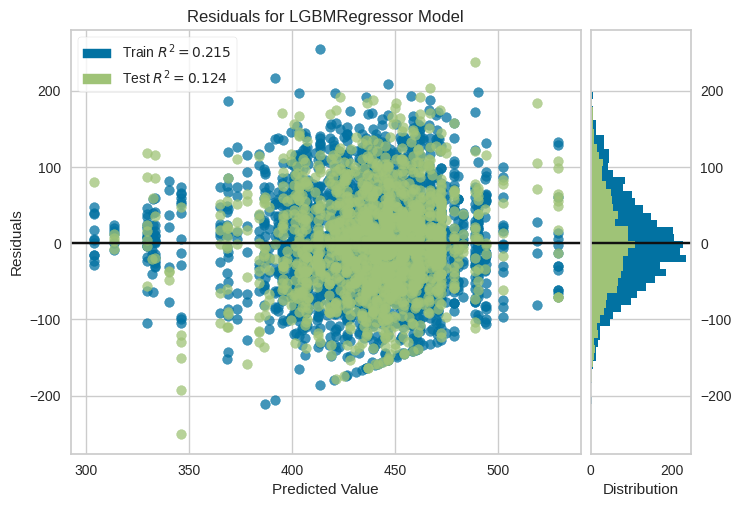

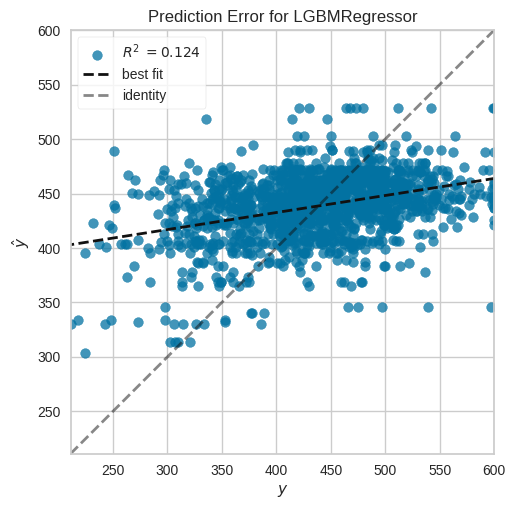

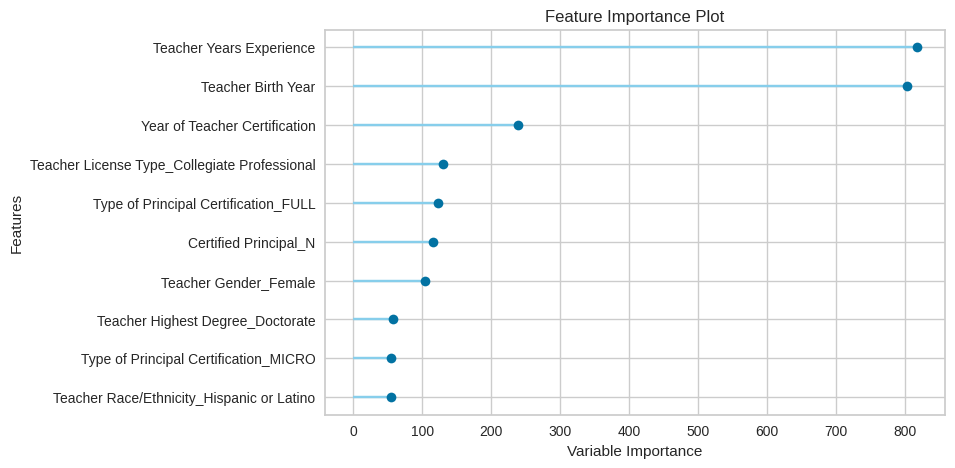

In [ ]:
model = tuned_lightgbm

plot_model(model)
plot_model(model, plot='error')
plot_model(model, plot='feature')